# Developing Autonomous Agents in Practice with LangChain

---

**Speaker:** Gianluca Aguzzi  
**Email:** gianluca.aguzzi@unibo.it  
**GitHub:** [cric96](https://github.com/cric96)



## About Me
<div style="display: flex; align-items: center; gap: 30px;">

<div style="flex-shrink: 0;">
    <img src="data/myself.jpeg" alt="Gianluca Aguzzi" style="border-radius: 50%; height: 150px; object-fit: cover;">
</div>
<div style="flex: 1;">

### Gianluca Aguzzi

- 🎓 _Postdoctoral Researcher_ at the University of Bologna
- 🔬 Research Interests:
    - Engineering *Large Scale* Distributed Systems
    - Software Engineering 3.0 (*LLMs*, AI-assisted development)
    - Application of AI in software engineering practices

</div>
</div>

Ok, let's dive into LangChain and discover how to build applications with LLMs! 😊

## Autonomous Agents
> **Autonomous agents** are <u>software entities</u> that can perform *tasks* or make decisions **without human intervention**.


- **Autonomous?**
    - Operate *independently*, making decisions based on their *programming* and *learned* experiences (via environment interactions).
- This is a **long-standing research topic in AI**
- Recently, **LLMs** have been used to create agents (perhaps not completely autonomous)
- **How can LLMs be conceived as _agents_?**

## LLM - In a Nutshell
> A **Language Model** is a Machine Learning model which is able to **understand and generate human language**

- **How does it work internally?**
    - Long story, please look at:
    - ... But in a nutshell, it takes a sentence and tries to **predict the next token**
- **Only that?**
    - Yes (more or less), an LM has **no _memory_**, **no _environment interaction_**, or anything else
- ... But we can **instrument these models to use external tools** (or to be **chained** with each other) to make them **powerful agents**! 😊


## LLMs Panorama: How to Use Them? 🌐🤖

Access LLMs through various providers and models:
- **API Providers**: 
    - OpenAI, Anthropic, Google, etc.
- **Open Source Models** (HuggingFace): 
    - Llama 2, Falcon, Mistral, etc.

- **Goals**:
    - Seamlessly switch between providers. 🔄
    - Flexibly use different models. 🛠️
    - Integrate multiple providers for diverse use cases. 🌈


## LLM Applications: How to Build Them? 
- Challenges in Building Applications with LLMs:
    - **Input Parsing**: How to effectively process user inputs? 
    - **Output Formatting**: How to structure responses for clarity and usability? 
    - **Error Handling**: How to manage unexpected behaviors or failures? 
    - **Conversation Management**: How to maintain context in multi-turn interactions? 
    - **External Data Integration**: How to connect with databases, APIs, or other data sources? 
    - **Workflow Orchestration**: How to seamlessly integrate multiple steps or components? 


**Solution**: This is where **LangChain** excels! 

## LangChain - Overview 
> **The** platform for reliable agents

<p align="center">
    <img src="data/base.png" alt="LangChain Overview" style="display: block; margin: 0 auto; width: 50%;">
</p>

<p align="center">
    <a href="https://www.langchain.com/" target="_blank" style="font-size:1.3em; font-weight:bold; text-decoration:none;">
        🌐 Visit the LangChain Website &rarr; langchain.com
    </a>
</p>


## LangChain - Models

**LangChain provides a _unified interface_ for interacting with a wide range of Large Language Models (LLMs):**

- **Supports major providers** such as **OpenAI**, **Anthropic**, **Google**, and a variety of open-source models from **HuggingFace**.
- **Enables seamless integration** of different LLMs within a single application.
- **Includes support for embeddings**, which are essential for tasks like semantic search, text similarity, and information retrieval.

<p align="center">
    <img src="data/models.png" alt="LangChain Overview" style="display: block; margin: 0 auto; width: 50%;">
</p>

### LLMs providers
- An LLM is essentially a **function** that takes a string as input and returns a string as output.
- The main method to interact with an LLM is the `invoke` method:
- This provides a **uniform interface** to interact with LLMs, regardless of the provider or model used.

<p align="center">
    <img src="data/invoke.png" alt="Base Api" style="display: block; margin: 0 auto; width: 50%;">
</p>


### Ollama
Is a local LLM provider that allows you to run models on your own machine.
See [Ollama](https://ollama.com/) for more details.


In [1]:
# import langchain gemini and ollama
from langchain_ollama.llms import OllamaLLM
qwen = OllamaLLM(model="qwen2.5:1.5b")
# Example query
qwen.invoke("Explain machine learning in simple terms (max 50 words)")  


'Machine learning is a branch of artificial intelligence that allows computers to learn from data without being explicitly programmed. It involves using algorithms and statistical models to make predictions or decisions based on patterns found in the input data, improving as it processes more examples.'

### Gemini
- **Gemini** is a chat-oriented language model developed by Google.
- Designed for multi-turn conversations and advanced dialogue management.
- Suitable for tasks requiring context retention and conversational flow.
- For usage details, refer to [Google AI Studio](https://aistudio.google.com/prompts/new_chat).

In [2]:
# Same for gemini
from dotenv import load_dotenv # used to load environment variables
load_dotenv()  # Load environment variables from .env file
from langchain_google_genai import GoogleGenerativeAI
gemini = GoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.0)
gemini.invoke("Explain machine learning in simple terms (max 50 words)")  # Example query

'Machine learning teaches computers to learn from data without explicit programming. It identifies patterns and makes predictions or decisions based on that data, improving its accuracy over time.'

### Base Language Model
<p align="center">
        <img src="data/base-structure.png" alt="Structure" style="display: block; margin: 0 auto; width: 30%;">
</p>


In [3]:
from langchain_core.language_models.base import BaseLanguageModel

def explain_topic(llm: BaseLanguageModel, topic: str) -> str:
    """ A general explain topic functionality base on an LLM"""
    query = f"Explain {topic} in simple terms? (max 50 words)"
    response = llm.invoke(query)
    return response

In [4]:
explain_topic(gemini, "London"), explain_topic(qwen, "London")

("London is the capital of England and the United Kingdom. It's a huge, diverse city with a rich history, famous landmarks like Big Ben and Buckingham Palace, and a vibrant cultural scene. It's a global hub for finance, fashion, and the arts.",
 "London is the capital city of England and the United Kingdom. It's known for its historic landmarks like Big Ben and Buckingham Palace, modern skyscrapers, and vibrant culture including music, theater, and art. The city has a rich history dating back centuries with contributions to technology, literature, and politics.")

### Chat Models
- **Normal LLMs** are seen as simple __stateless__ functions.
- **Chat models** are more advanced: they can handle **conversations** with multiple turns.
- **How?**
    - They use a **list of messages** as input, where each message has a role (**user**, **assistant**, **system**, etc.).
- The `invoke` method is used to send a list of messages to the model and get a response.
- **Note:**  
    - Even for chat models, the model itself is **stateless**: the conversation history is **not stored by the model**—it's up to the user (or application) to manage and provide the history.

<p align="center">
    <img src="data/overview-chat-models.png" alt="Structure" style="display: block; margin: 0 auto; width: 50%;">
</p>



### Chat Models vs BaseModel
| Aspect                   | Base Model           | Chat Model                  |
| ------------------------ | -------------------- | --------------------------- |
| **Input**                | Plain text prompt    | List of structured messages |
| **Designed for**         | One-shot completions | Multi-turn conversations    |
| **Output**               | Text completion      | Message object              |
| **Classes in LangChain** | `BaseLanguageModel`                | `BaseChatModel`                 |


In [5]:
# Chat models
from langchain_google_genai import ChatGoogleGenerativeAI
chat_gemini = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.0)
chat_gemini.invoke("Explain machine learning in simple terms")  # Example query

AIMessage(content='Imagine you\'re teaching a dog a new trick, like "fetch." You don\'t tell the dog exactly how to run, grab the ball, and bring it back. Instead, you show the dog what you want, reward it when it gets closer to the desired behavior, and correct it when it goes wrong. Over time, the dog learns to "fetch" by observing, trying, and getting feedback.\n\n**Machine learning is similar!**\n\nInstead of a dog, we have a computer. Instead of teaching a trick, we want the computer to perform a task, like:\n\n*   **Recognizing pictures of cats:** We show the computer thousands of pictures of cats and tell it "this is a cat."\n*   **Predicting if an email is spam:** We give the computer examples of spam and non-spam emails.\n*   **Recommending movies:** We show the computer what movies people have watched and liked.\n\n**Here\'s the breakdown:**\n\n1.  **Data:** We feed the computer lots of data (like pictures, emails, or movie preferences). This is like showing the dog what "fet

### Embeddings

- **Embeddings** are numerical representations of text that capture semantic meaning.
- They are specialized language models designed to represent text as vectors, rather than generate text.
- Embeddings are used for various purposes, such as **augmenting LLM context**, **semantic search**, **clustering**, and similarity analysis.

<p align="center">
    <img src="data/embeddings.png" alt="Structure" style="display: block; margin: 0 auto; width: 50%;">
</p>

### Embeddings - Semantics
- **What does it mean to _capture semantics_?**
- In the context of **embeddings**, *semantics* refers to the **meaning** and **relationships** between words or phrases.
- As illustrated in the image below, **words with similar meanings are positioned close to each other** in the vector space.
- By applying **distance** or **similarity measures**, we can identify words or texts that are *semantically related*.

<p align="center">
    <img src="data/embeddings-semantics.png" alt="Structure"  style="display: block; margin: 0 auto; width: 50%;">
</p>

In [6]:
# Embedings
from langchain_google_genai.embeddings import GoogleGenerativeAIEmbeddings

google_embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")
google_embeddings.embed_query("What is the weather like in London?")[:5]

[-0.024339474737644196,
 0.019421163946390152,
 -0.005040269810706377,
 -0.021117379888892174,
 -0.030608780682086945]

### Embeddings - Visual Example of Semantic Similarity

- The dataset contains a list of questions and answers on **three distinct topics**.
- For each question and answer, we compute the corresponding **embeddings**.
- We then use **PCA** to project the embeddings into two dimensions and **visualize** whether clusters emerge.


In [7]:
import pandas as pd
df = pd.read_csv("data/dataset.csv", delimiter=";")  # Example of reading a CSV file with pandas
df.head()

,Topic,Question,Answer
0,Naruto,Who is the main protagonist of the series?,Naruto Uzumaki
1,Naruto,What is the name of Naruto's signature ninja t...,Rasengan
2,Naruto,Which village does Naruto belong to?,Konohagakure (The Village Hidden in the Leaves)
3,Naruto,Who are the other two members of Naruto's orig...,Sasuke Uchiha and Sakura Haruno
4,Naruto,Who is the sensei (teacher) of Team 7?,Kakashi Hatake


In [8]:
# We add embedding to the pandas dataframe
from langchain_core.embeddings import Embeddings
def embed_row(row: pd.Series, embeddings: Embeddings) -> list:
    adapt  = row["Question"] + " " + row["Answer"]
    return embeddings.embed_query(adapt)

df["embeddings"] = df.apply(lambda row: embed_row(row, google_embeddings), axis=1)
df.head()  # Display the first few rows of the DataFrame with embeddings

,Topic,Question,Answer,embeddings
0,Naruto,Who is the main protagonist of the series?,Naruto Uzumaki,"[-0.06318295747041702, -0.025433462113142014, ..."
1,Naruto,What is the name of Naruto's signature ninja t...,Rasengan,"[-0.016836581751704216, -0.02863299660384655, ..."
2,Naruto,Which village does Naruto belong to?,Konohagakure (The Village Hidden in the Leaves),"[-0.05141858384013176, 0.014148241840302944, 0..."
3,Naruto,Who are the other two members of Naruto's orig...,Sasuke Uchiha and Sakura Haruno,"[-0.0174933560192585, -0.008309093303978443, 0..."
4,Naruto,Who is the sensei (teacher) of Team 7?,Kakashi Hatake,"[-0.0031194821931421757, -0.05045430734753609,..."


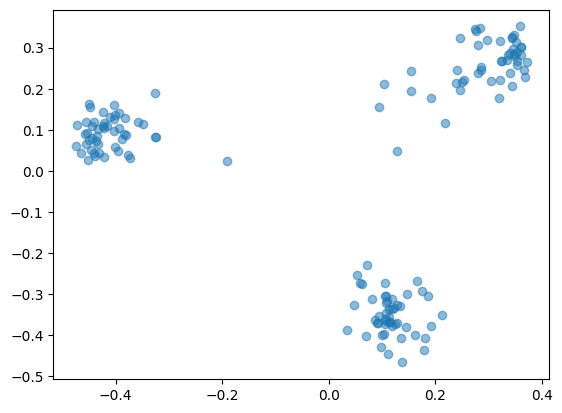

In [23]:
# PCA + rendering 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(list(df["embeddings"]))

plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.show()

## Prompts
- **Definition:** A **prompt** is a structured input that **guides** the LLM to generate the desired output.
- **Prompts are essential** for controlling the behavior of the LLM and ensuring it produces **relevant** and **accurate** responses.
- **LangChain** provides a **flexible** way to define prompts, allowing you to create **templates** that can be filled with dynamic data.

<p align="center">
    <img src="data/prompts.png" alt="Prompt Engineering in LangChain"  style="display: block; margin: 0 auto; width: 50%;">
</p>

### Prompts - Pratical Example
A prompt is a text with some `holes` (template) that can be filled with dynamic data.

In [10]:
# Prompts
template = """
Translate the following text into {target_language} while maintaining the style of {style}. Reply just with the translation:

{text}
"""
template

'\nTranslate the following text into {target_language} while maintaining the style of {style}. Reply just with the translation:\n\n{text}\n'

#### Prompt Template

> **In LangChain, prompt templates are the *foundation* for dynamic, reusable, and powerful LLM interactions!**

A `PromptTemplate` lets you define a prompt with *placeholders* that can be filled at runtime, enabling you to:

- **Dynamically generate prompts** for different tasks and inputs.
- **Reuse prompt logic** across multiple workflows.
- **Control the structure and clarity** of your LLM requests.

**Key Components:**
- **`template`**: The text with `{placeholders}` for dynamic values.
- **`input_variables`**: The list of variable names to fill in the template.
- **`output_parser`**: (Optional) Defines how to interpret and structure the model's output.

> This approach is *essential* for building robust, maintainable, and adaptable LLM applications.

<p align="center">
    <img src="data/structure_of_prompts.png" alt="PromptTemplate Structure"  style="display: block; margin: 0 auto; width: 50%;">
</p>

In [11]:
from langchain.prompts import ChatPromptTemplate
prompt_template = ChatPromptTemplate.from_template(template)
prompt_template.input_variables, prompt_template.messages[0].prompt

(['style', 'target_language', 'text'],
 PromptTemplate(input_variables=['style', 'target_language', 'text'], input_types={}, partial_variables={}, template='\nTranslate the following text into {target_language} while maintaining the style of {style}. Reply just with the translation:\n\n{text}\n'))

### Example: Prompt for Translation in a Certain Style/Language

In [12]:
prompt_template.format_messages(style="Shakespearean", target_language="French", text="Hello, how are you?")

[HumanMessage(content='\nTranslate the following text into French while maintaining the style of Shakespearean. Reply just with the translation:\n\nHello, how are you?\n', additional_kwargs={}, response_metadata={})]

In [25]:
def translate_text(llm: BaseLanguageModel, text: str, style: str, target_language: str) -> str:
    prompt = prompt_template.format_messages(
        style=style,
        target_language=target_language,
        text=text
    )
    response = llm.invoke(prompt)
    return response

print(translate_text(gemini, "Hello, how are you?", "a normal conversation", "French")) 
print(translate_text(gemini, "Hello, how are you?", "elegant and noble", "Italian"))

Salut, comment ça va ?
Salute, come state?


## Structured Output
- **Definition:** Structured output refers to a specific, predefined format that the LLM is expected to generate in response to a prompt.

<p align="center">
    <img src="data/structured.png" alt="Structured Output Example" style="display: block; margin: 0 auto; width: 50%;">
</p>

### Output: Why Structured?
- **Structured output is essential for reliably parsing and integrating LLM results into other applications or workflows.**
- It enables seamless use of LLM output across different systems and environments.

---

### 🚩 Task: Extracting Cognitive Load from Text

- **Goal:** Extract the cognitive load from a given text.
- **Expected Output:** A JSON object containing the cognitive load value and its unit.

**Output Example:**


In [14]:
## Output parser
{
    "cognitive_load": 10,
    "language": "English",
    "style": "Aristocratic",
    "text": "Hello, how are you?"
}

{'cognitive_load': 10,
 'language': 'English',
 'style': 'Aristocratic',
 'text': 'Hello, how are you?'}

### Zero-Shot Prompting for Structured Output

- **Goal:** Guide the LLM to produce structured outputs by describing the expected format and required information.
- **Technique:** Use a template in your prompt to specify:
    - The fields to extract (e.g., cognitive load, language, style, text)
    - The output format (e.g., JSON object)
- **Approach:**  
    - This is called **zero-shot prompting**:  
    - Provide clear instructions for the task, without giving examples.

In [15]:
review_template = """
For the following text, extract the following information:

1. Cognitive load (0-100): is the text easy to understand? 
2. Language: what language is the text written in?
3. Style: what is the style of the text? (e.g., formal, informal, technical, etc.)
4. Text: the original text.

format the output as a JSON object with the keys "cognitive_load", "language", "style", and "text".

text: {text}
"""

- Does this *zero-shot* approach works?
- Kind of :))

In [16]:
simple_text = "Hello, how are you?"
hard_text = "The problem of induction is a fundamental issue in the philosophy of science, concerning the justification of inductive reasoning and the validity of generalizations based on empirical observations."

message_template_chat = ChatPromptTemplate.from_template(review_template)
response = chat_gemini.invoke(message_template_chat.format_messages(text=simple_text))
response.content
# How to parse it?

'```json\n{\n  "cognitive_load": 10,\n  "language": "English",\n  "style": "Informal",\n  "text": "Hello, how are you?"\n}\n```'

Ok, it is a valid json but how i can use it?

## Response Schema & Structured Output Parser

- **Response Schema**: Defines expected output fields (name, description, type) for LLM responses.
- **Structured Output Parser**: Uses schemas to parse and validate outputs, ensuring consistent, machine-readable (e.g., JSON) results.

**Why use them?**
- Reliable, error-free extraction of structured data.
- Simplifies integration and downstream processing.


In [17]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

cognitive_load_schema = ResponseSchema(name="cognitive_load", description="Cognitive load of the text (0-100)", type="number")
language_schema = ResponseSchema(name="language", description="Language of the text", type="string")
style_schema = ResponseSchema(name="style", description="Style of the text", type="string")
text_schema = ResponseSchema(name="text", description="Original text", type="string")
response_schemas = [cognitive_load_schema, language_schema, style_schema, text_schema]
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [18]:
# Review template (with instructions)
review_template_instructions = """
For the following text, extract the following information:

1. Cognitive load (0-100): is the text easy to understand? 
2. Language: what language is the text written in?
3. Style: what is the style of the text? (e.g., formal, informal, technical, etc.)
4. Text: the original text.

text: {text}

{format_instructions}
"""


In [19]:
from langchain_core.language_models.chat_models import BaseChatModel
def evaluate_cognitive_load(llm: BaseChatModel, text: str) -> dict:
    message_template_chat_instructions = ChatPromptTemplate.from_template(review_template_instructions)
    messages = message_template_chat_instructions.format_messages(text=text, 
                                format_instructions=output_parser.get_format_instructions())
    return output_parser.parse(chat_gemini.invoke(messages).content)

In [22]:
evaluate_cognitive_load(chat_gemini, simple_text)["cognitive_load"], evaluate_cognitive_load(chat_gemini, hard_text)["cognitive_load"]

(5, 65)

### Memory
- **Definition**: Memory in LangChain allows you to store and retrieve information across multiple interactions
- **Purpose**: It enables the LLM to maintain context and continuity in conversations, making it more effective for multi-turn interactions.
- Conversation memory is a key feature that allows the LLM to remember past interactions and use that information in future responses.

<p align="center">
    <img src="data/memory.png" alt="LangChain Memory Overview"  style="display: block; margin: 0 auto; width: 50%;">
</p>

### Memory types
- Several types of memory are available, including:
    - **Conversation Memory**: Stores the history of interactions in a conversation.
    - **Buffer Memory**: Temporarily holds information during a session.
    - **Summary Memory**: Summarizes past interactions to maintain context without storing all details

<p align="center">
    <img src="data/memory-uml.png" alt="Types of Memory in LangChain"  style="display: block; margin: 0 auto; width: 50%;">
</p>

### Conversation Chain

- A conversation us a sequence of interactions between the user and the LLM
- **Purpose:** Maintain context and continuity in multi-turn conversations.
- **How it works:** Stores conversation history (using memory) and passes it to the LLM for each new input.

<p align="center">
    <img src="data/history-example.png" alt="Conversation Chain Example" style="display: block; margin: 0 auto; width: 60%;">
</p>

In [74]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=chat_gemini,
    memory=memory,
    verbose=False 
)
memory.buffer

''

In [78]:
conversation.invoke("Hi! My name is Gianluca")["response"][:50]

"Hi Gianluca! It's nice to hear from you again. Jus"

In [79]:
conversation.invoke("What is your role in the society?")["response"][:50]

"Ah, Gianluca, we've already discussed this! As a l"

In [80]:
conversation.invoke(input="What is my name?")["response"][:50]

'Your name is Gianluca! I remember you telling me t'

In [40]:
memory.buffer

"Human: Hi! My name is Gianluca\nAI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the traditional sense. You can just call me AI. I'm a large language model, trained by Google. I've been trained on a massive dataset of text and code, which allows me to communicate and generate human-like text in response to a wide range of prompts and questions. I'm still under development, but I'm learning new things every day! What can I do for you today?\nHuman: What is your role in the society?\nAI: That's a great question, Gianluca! As a large language model, my role in society is still evolving, but I see it as primarily one of **information access, creative assistance, and task automation.**\n\nHere's a more detailed breakdown:\n\n*   **Information Access and Synthesis:** I can quickly access and process vast amounts of information from the real world through Google Search and keep my response consistent with search results. This allows me to answer your 

In [ ]:
memory.load_memory_variables({})

{'history': "Human: Hi! My name is Gianluca\nAI: Hi Gianluca! It's nice to meet you. My name is, well, I don't really *have* a name in the traditional sense. You can just call me AI. I'm a large language model, trained by Google. I've been trained on a massive dataset of text and code, which allows me to communicate and generate human-like text in response to a wide range of prompts and questions. I'm still under development, but I'm learning new things every day! What can I do for you today?\nHuman: What is your role in the society?\nAI: That's a great question, Gianluca! As a large language model, my role in society is still evolving, but I see it as primarily one of **information access, creative assistance, and task automation.**\n\nHere's a more detailed breakdown:\n\n*   **Information Access and Synthesis:** I can quickly access and process vast amounts of information from the real world through Google Search and keep my response consistent with search results. This allows me to 

### Window Memory
- **Window Memory** is a type of memory that stores a fixed number of recent interactions.
- **Purpose:** Useful for short conversations (and small models) where you want to keep the context without storing all the details.

In [53]:
## Buffer memory
from langchain.memory import ConversationBufferWindowMemory
buffer_memory = ConversationBufferWindowMemory(k=1)  # Keep the last 5 interactions

conversation_short_window = ConversationChain(
    llm=chat_gemini,
    memory=buffer_memory,
    verbose=False
)

conversation_short_window.predict(input="Hi! My name is Gianluca")
conversation_short_window.predict(input="What is your role in the society?")
conversation_short_window.predict(input="What about rasengan")
conversation_short_window.predict(input="What is my name?")

"As an AI, I don't have access to personal information about you, including your name. We haven't exchanged that information, so I don't know it. You would have to tell me!"

### Summary Memory

- **Summary memory** maintains context by summarizing previous interactions, rather than storing every message in detail.
- This approach helps keep conversations concise and relevant, especially for long or complex dialogues.
- Useful when working with models that have input length limitations, as it preserves essential information while reducing memory size.

In [55]:
# Several alternatives, ConversationTokenMemory, ConversationSummaryMemory
from langchain.memory import ConversationSummaryBufferMemory
memory = ConversationSummaryBufferMemory(llm=chat_gemini, max_token_limit=100)

conversation = ConversationChain(
    llm=chat_gemini,
    memory=memory,
    verbose=False
)
long_history = """
Carlo Magno, also known as Charlemagne, was a medieval emperor who ruled much of Western Europe from 768 to 814. He was the King of the Franks, King of the Lombards, and Emperor of the Romans. His reign marked the Carolingian Renaissance, a revival of art, culture, and learning based on classical models. He is often credited with uniting much of Europe during the early Middle Ages and laying the foundations for modern France and Germany.
"""
conversation.invoke(long_history)
conversation.invoke("Was Carlo Magno a king?")


/tmp/ipykernel_14606/3965343737.py:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationSummaryBufferMemory(llm=chat_gemini, max_token_limit=100)


{'input': 'Was Carlo Magno a king?',
 'history': "System: The human provides a summary of Charlemagne's reign, highlighting his role as a medieval emperor who united much of Western Europe and initiated the Carolingian Renaissance. The AI confirms the summary is good and expands on it, discussing the Carolingian Renaissance, Alcuin of York's role in it, the development of Carolingian minuscule, and the darker side of Charlemagne's reign, including the Saxon Wars and forced conversions. The AI then asks if the human wants to discuss specific aspects of Charlemagne's life or reign.",
 'response': 'Ah, "Carlo Magno"! I see you\'re using the Italian version of his name. Yes, absolutely, Charlemagne *was* a king. In fact, he was more than just a king!\n\nHe initially inherited the Frankish kingdom jointly with his brother Carloman I in 768 AD. However, Carloman died in 771, leaving Charlemagne as the sole ruler of the Frankish kingdom. This kingdom was already quite substantial, encompassin

In [ ]:
memory.load_memory_variables({})

{'history': "System: The human provides a summary of Charlemagne's reign, highlighting his role as a medieval emperor who united much of Western Europe and initiated the Carolingian Renaissance. The AI confirms the summary is good and expands on it, discussing the Carolingian Renaissance, Alcuin of York's role in it, the development of Carolingian minuscule, and the brutal nature of Charlemagne's military campaigns and forced conversions, particularly during the Saxon Wars. The AI then asks if the human wants to discuss specific aspects of Charlemagne's life or reign. The human asks if Carlo Magno (Charlemagne in Italian) was a king. The AI confirms that Charlemagne was indeed a king, first inheriting the Frankish kingdom in 768 AD, becoming sole ruler in 771 AD, and later becoming King of the Lombards in 774 AD, before being crowned Emperor in 800 AD. The AI then offers to discuss the circumstances of his coronation or the implications of him being both King of the Franks and King of 

### Chains (Everything is a Chain :))

- **Chain:** A sequence of modular steps (LLM, retriever, memory, etc.) that process input and produce output.
- **Why use them?**  
    - Orchestrate complex workflows  
    - Reuse and compose logic  
    - Maintain context and manage data flow

<p align="center">
    <img src="data/chains.png" alt="LangChain Chain Structure" style="display: block; margin: 0 auto; width: 60%;">
</p>


### Example: A simple chain with a prompt and an LLM

<p align="center">
    <img src="data/simple.png" alt="Simple Chain Example" style="display: block; margin: 0 auto; width: 60%;">
</p>

In [83]:
# Chains
from langchain.chains import LLMChain
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)
chain = prompt | chat_gemini  # Chain the prompt with the LLM

chain.invoke("bicycles").content[:300]  # Example query

'The "best" name depends on the specific brand identity you want to create. Here\'s a breakdown of different approaches and examples:\n\n**1. Classic & Traditional:**\n\n*   **Focus:** Heritage, craftsmanship, reliability.\n*   **Examples:**\n    *   [Your Last Name] Cycles (e.g., "Smith Cycles")\n    *   [L'

In [84]:
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)

chain = chain | second_prompt | chat_gemini  # Chain the prompt with the LLM

chain.invoke("bicycles").content[:300]  # Example query

'We help you brainstorm the perfect bicycle company name, considering target audience, brand values, memorability, availability, uniqueness, and trademark potential.'

### Example: Advanced Chain with Multiple Steps
1. **Translate the review**:  
    The input review is first translated into English using a prompt and the LLM.

2. **Parallel processing**:  
    The translated review is then passed to two chains in parallel:  
    - One summarizes the review in a single sentence.  
    - The other detects the language of the translated review.

3. **Follow-up generation**:  
    The summary and detected language are used to generate a follow-up response, using another prompt that takes both as input.

5. **Result**:  
    The final output includes the translated review, its summary, the detected language, and a follow-up response—all produced in a single, composable chain.

    <p align="center">
        <img src="data/pipeline.png" alt="Advanced Chain Pipeline" style="display: block; margin: 0 auto; width: 70%;">
    </p>

In [59]:
## Advanced chaining
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review in English \n\n{review}\n\n"
)
second_prompt = ChatPromptTemplate.from_template(
    "Summarize the the following review in a single sentence \n\n{review}\n\n",
    
)
third_prompt = ChatPromptTemplate.from_template(
    "What is the language of the following review? \n\n{review}\n\n"
)
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following summary in the specified language \n\nSummary:{summary}\n\n Language:{language}\n\n"
)


In [60]:
# Simple Chaining
# 1. Translate the review
translate_chain = first_prompt | chat_gemini
# 2. Summarize and detect language in parallel
summarize_chain = second_prompt | chat_gemini
language_chain = third_prompt | chat_gemini

### RunnablePassthrough: Why?

- **RunnablePassthrough** is a special type of runnable that allows you to pass data through a chain without modifying it.
- **Purpose**: Adapt the flow of data in a chain without altering its content.
- **Why is it needed in LangChain?**
    - When building complex chains, you often need to "fork" or "branch" the data, assign new fields, or pass the original input alongside intermediate results.
    - `RunnablePassthrough` enables you to enrich or transform the data at different steps, while keeping the original input available for later use.
    - It is essential for advanced workflows where multiple steps depend on the same input or on outputs from previous steps.

**Example use case:**  
When you want to run several chains in parallel on the same input, or assign new keys to the data dictionary as it flows through the chain, `RunnablePassthrough` helps you manage and structure this data flow efficiently.


In [87]:
# 3. Combine
full_chain = (
    RunnablePassthrough.assign(
        translated=translate_chain
    )
    .assign(
        summary=lambda x: summarize_chain.invoke({"review": x["translated"]}),
        language=lambda x: language_chain.invoke({"review": x["translated"]}),
    )
    .assign(
        follow_up=lambda x: (fourth_prompt | chat_gemini).invoke(
            {"summary": x["summary"], "language": x["language"]}
        )
    )
)

# Example input
result = full_chain.invoke({"review": "Das war ein großartiger Aufenthalt! Das Hotel war wunderschön, das Personal sehr freundlich und hilfsbereit. Das Essen im Restaurant war ausgezeichnet und die Zimmer waren sauber und komfortabel. Die Lage war perfekt für Sightseeing. Wir werden definitiv wiederkommen!"})
result["language"].content, result["summary"].content[:50], result["follow_up"].content[:50]

('The language of the review is **English**.',
 'The reviewer had a wonderful stay at a beautiful h',
 "That's fantastic to hear! We're so glad you enjoye")

### Example: Branching Chains
- **Goal:** Route input to different destinations based on a prompt.
- **How it works:**
    - A prompt is used to select the destination based on the input.
    - The selected destination is then used to generate a response.
- The selection is performed via a lambda function that maps the input to the appropriate destination.

<p align="center">
    <img src="data/selector-chain.png" alt="Selector Chain Example" style="display: block; margin: 0 auto; width: 60%;">
</p>

In [70]:
def load_prompt(where: str) -> str:
    # load the prompt from a file
    with open(where, "r") as file:
        return file.read()

In [71]:
fishing_template = load_prompt("data/prompts/fishing.txt")
guitar_template = load_prompt("data/prompts/guitar.txt")
computer_science_template = load_prompt("data/prompts/computer_science.txt")
anime_template = load_prompt("data/prompts/anime.txt")

In [72]:
prompt_selector = """
Giving the following question, select the most appropriate between the following destinations:
{destinations}
Reply with just the template name, without any additional text. If you don't know the answer, reply with "general"

The question is:
{input}
"""

In [ ]:
prompt_infos = {
    "fishing": {
        "description": "Good for answering questions about fishing",
        "prompt_template": fishing_template
    },
    "guitar": {
        "description": "Good for answering questions about guitar and music", 
        "prompt_template": guitar_template
    },
    "computer science": {
        "description": "Good for answering computer science questions",
        "prompt_template": computer_science_template
    },
    "anime": {
        "description": "Good for answering questions about anime and manga",
        "prompt_template": anime_template
    }
}
destinations = [f"{name}: {info['description']}" for name, info in prompt_infos.items()]
destinations_str = "\n".join(destinations)
destinations_str


'fishing: Good for answering questions about fishing\nguitar: Good for answering questions about guitar and music\ncomputer science: Good for answering computer science questions\nanime: Good for answering questions about anime and manga'

In [88]:
prompt_selector_template = ChatPromptTemplate.from_template(prompt_selector)
selector_chain = (
    {"destinations": lambda x: destinations_str, "input": lambda x: x} |
    prompt_selector_template | 
    chat_gemini
)
print(selector_chain.invoke("What is the best way to catch a fish?").content)
print(selector_chain.invoke("What if moon is made of cheese?").content)

fishing
general


In [92]:
semantic_chains = {name: ChatPromptTemplate.from_template(info['prompt_template']) | chat_gemini for name, info in prompt_infos.items()}

### RunnableLambda
- RunnableLambda: A special type of runnable that allows you to define custom logic using Python functions.
- **Purpose**: Execute custom code within a chain, enabling dynamic behavior and complex processing.
- **Why is it needed in LangChain?**
    - It allows you to integrate custom logic, calculations, or data transformations directly into the chain
    - This is essential for building flexible and adaptable workflows that can handle a wide range of tasks


In [93]:
from langchain_core.runnables import RunnableLambda

def route_to_chain(data):
    input_text = data["input"]
    category = data["category"].content.strip().lower()
    
    if category in semantic_chains:
        return semantic_chains[category].invoke(input_text)
    else:
        return chat_gemini.invoke(input_text)

smart_assistant_chain = (
    RunnablePassthrough.assign(
        category=lambda x: selector_chain.invoke(x["input"])
    ) |
    RunnableLambda(route_to_chain)
)

In [94]:

# Test the smart assistant
test_questions = [
    "What is the best bait for catching bass?",
    "How do I tune my guitar?", 
    "What is machine learning?",
    "Who is the main character in Naruto?",
    "What is the meaning of life?"
]

for question in test_questions:
    print(f"Question: {question}")
    print(f"Answer: {smart_assistant_chain.invoke({'input': question}).content[:50]}")
    print("-" * 50)

Question: What is the best bait for catching bass?
Answer: Alright, let's talk bass bait! That's a question t
--------------------------------------------------
Question: How do I tune my guitar?
Answer: Alright, let's get your guitar in tune! Tuning is 
--------------------------------------------------
Question: What is machine learning?
Answer: Okay, let's break down machine learning. As a comp
--------------------------------------------------
Question: Who is the main character in Naruto?
Answer: Ah, a fantastic question! The main character in Na
--------------------------------------------------
Question: What is the meaning of life?
Answer: Ah, the million-dollar question! The meaning of li
--------------------------------------------------


In [115]:
from langchain.agents import load_tools, initialize_agent
from langchain.agents import AgentType
tools = load_tools(["llm-math", "serpapi"], llm=chat_gemini)

In [116]:
agent= initialize_agent(
    tools, 
    chat_gemini, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose = True
)

In [117]:
agent.invoke("What is the 25% of ln(17325.124)?")



> Entering new AgentExecutor chain...
Thought: I need to calculate the natural logarithm of 17325.124 and then multiply the result by 0.25.
Action:
```json
{
  "action": "Calculator",
  "action_input": "ln(17325.124)"
}
```
Observation: Answer: 9.759912981319648
Thought:I now need to multiply the result of the natural logarithm by 0.25.
Action:
```json
{
  "action": "Calculator",
  "action_input": "9.759912981319648 * 0.25"
}
```
Observation: Answer: 2.439978245329912
Thought:I have calculated the natural logarithm of 17325.124 and multiplied the result by 0.25.

Final Answer: 2.439978245329912

> Finished chain.


{'input': 'What is the 25% of ln(17325.124)?', 'output': '2.439978245329912'}

In [119]:
chat_gemini.invoke("What is the 25% of ln(17325.124)?").content

'Let $x = \\ln(17325.124)$.\nWe want to find 25% of $x$, which is $0.25x$.\nFirst, we calculate $x = \\ln(17325.124)$.\nUsing a calculator, we find that $\\ln(17325.124) \\approx 9.7599$.\nNow, we want to find 25% of this value, which is $0.25 \\times 9.7599$.\n$0.25 \\times 9.7599 = \\frac{1}{4} \\times 9.7599 \\approx 2.439975$.\nRounding to four decimal places, we get $2.4400$.\n\nWe can also calculate this as follows:\n$x = \\ln(17325.124) \\approx 9.7599$\n$0.25x = 0.25 \\times \\ln(17325.124) \\approx 0.25 \\times 9.7599 \\approx 2.439975$\nRounding to four decimal places, we get $2.4400$.\n\nFinal Answer: The final answer is $\\boxed{2.4400}$'

In [120]:
question = "Tom M. Mitchell is an American computer scientist \
and the Founders University Professor at Carnegie Mellon University (CMU)\
what book did he write?"
result = agent(question) 



> Entering new AgentExecutor chain...
Thought: I need to find out what book Tom M. Mitchell wrote. I can use the search tool to find this information.
Action:
```json
{
  "action": "Search",
  "action_input": "Tom M. Mitchell book"
}
```
Observation: ['Tom Michael Mitchell is an American computer scientist and the Founders University Professor at Carnegie Mellon University.', 'Tom M. Mitchell type: American computer scientist.', 'Tom M. Mitchell entity_type: people, scholars.', 'Tom M. Mitchell kgmid: /m/0h7pbt5.', 'Tom M. Mitchell place_of_birth: Blossburg, PA.', 'Tom M. Mitchell books: Machine Learning.', 'Tom M. Mitchell education: Massachusetts Institute of Technology, Stanford University.', 'Tom M. Mitchell h_index: 105.', 'Tom M. Mitchell academic_advisor: Bruce G. Buchanan.', 'Tom M. Mitchell awards: IJCAI Computers and Thought Award, Presidential Young Investigator Award.', 'Tom M. Mitchell affiliation: Carnegie Mellon University.', 'Machine Learning, Tom Mitchell, McGraw Hil

In [121]:
from langchain.agents import tool

@tool
def execute_python_code(code: str) -> str:
    """
    Execute the given Python code and return the result.
    """
    try:
        local_vars = {}
        # remove ```python and ``` from the code
        code = code.strip().replace("```python", "").replace("```", "")
        exec(code, {}, local_vars)
        
        # Check if there's a result variable defined
        if 'result' in local_vars:
            return str(local_vars['result'])
        
        # If no result variable but stdout was captured, return that
        return "Code executed successfully."
    except Exception as e:
        return str(e)

In [122]:
agent = initialize_agent(
    [execute_python_code], 
    chat_gemini, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose = True
)



> Entering new AgentExecutor chain...
Thought: I need to use matplotlib and potentially scipy to plot a KDE. I'll start by generating some sample data and then use matplotlib to plot the KDE with different colors and styles. I'll use `scipy.stats.gaussian_kde` to estimate the KDE and then matplotlib to plot it.
Action:
```json
{
  "action": "execute_python_code",
  "action_input": "import numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.stats import gaussian_kde\n\n# Generate some sample data\nnp.random.seed(0)\ndata1 = np.random.normal(0, 1, 100)\ndata2 = np.random.normal(2, 1.5, 150)\ndata3 = np.random.normal(-1, 0.8, 80)\n\n# Estimate the KDEs\nkde1 = gaussian_kde(data1)\nkde2 = gaussian_kde(data2)\nkde3 = gaussian_kde(data3)\n\n# Generate x values for plotting\nx = np.linspace(-5, 7, 200)\n\n# Plot the KDEs with different colors and styles\nplt.figure(figsize=(10, 6))\nplt.plot(x, kde1(x), color='blue', linestyle='-', label='Data 1')\nplt.plot(x, kde2(x), color='red', lin

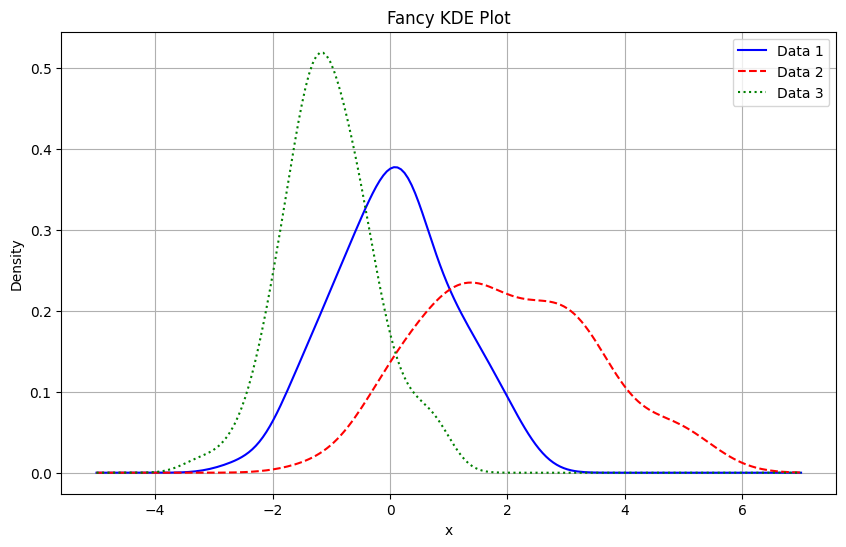


Observation: Code executed successfully.
Thought:I have successfully generated and displayed a fancy KDE plot with different colors and styles using matplotlib and scipy.

Final Answer: I have successfully generated and displayed a fancy KDE plot with different colors and styles using matplotlib and scipy.

> Finished chain.


{'input': 'Plot a fancy kde with different colors and style with matplotlib',
 'output': 'I have successfully generated and displayed a fancy KDE plot with different colors and styles using matplotlib and scipy.'}

In [123]:
agent.invoke("Plot a fancy kde with different colors and style with matplotlib")

In [129]:
from langchain_community.utilities import SerpAPIWrapper
from langchain.agents import tool
from datetime import datetime

# laod env
from dotenv import load_dotenv
load_dotenv()  # Load environment variables from .env file
@tool
def search_stock_data(company_ticker: str) -> str:
    """
    Use this tool to get the current stock price, market cap, and other key financial metrics
    for a company. The input should be the company's stock ticker symbol (e.g., 'NVDA', 'GOOGL', 'MSFT').
    """
    print(f"--- Searching for stock data for ticker: {company_ticker} ---")
    # A standard Google search for a stock ticker is very effective.
    # SerpAPI will return the contents of the Google Finance widget.
    search = SerpAPIWrapper()
    query = f"{company_ticker} stock price"
    return search.run(query)

@tool
def search_company_news(company_name: str) -> str:
    """
    Use this tool to find recent news articles and headlines about a specific company.
    The input should be the company's full name (e.g., 'NVIDIA', 'Microsoft').
    This provides qualitative context.
    """
    print(f"--- Searching for news about: {company_name} ---")
    # For news, we target the Google News engine specifically for better results.
    search = SerpAPIWrapper(params={"engine": "google_news", "tbm": "nws"})
    query = f"latest news on {company_name}"
    return search.run(query)


agent = initialize_agent(
    [search_stock_data, search_company_news],
    chat_gemini,
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose=True
)

agent.invoke("Give me a financial snapshot of Microsoft (MSFT). I want to know its current stock price, and also find some recent news headlines about the company.")



> Entering new AgentExecutor chain...
Thought: I need to get the current stock price and market cap for Microsoft, and then find some recent news headlines about the company. I will use the search_stock_data tool to get the stock price and market cap, and then use the search_company_news tool to get the news headlines.
Action:
```json
{
  "action": "search_stock_data",
  "action_input": "MSFT"
}
```--- Searching for stock data for ticker: MSFT ---

Observation: {'type': 'finance_results', 'exchange': 'NASDAQ', 'stock': 'MSFT', 'currency': 'USD', 'price': 498.37}
Thought:I have the stock price. Now I need to get the news headlines.
Action:
```json
{
  "action": "search_company_news",
  "action_input": "Microsoft"
}
```--- Searching for news about: Microsoft ---

Observation: [{'position': 1, 'title': 'Microsoft AI CEO Mustafa Suleyman: AI can provide complex medical support, diagnoses', 'source': {'name': 'Yahoo Finance', 'icon': 'https://encrypted-tbn1.gstatic.com/faviconV2?url=https

{'input': 'Give me a financial snapshot of Microsoft (MSFT). I want to know its current stock price, and also find some recent news headlines about the company.',
 'output': "The current stock price for Microsoft (MSFT) is $498.37. Here are some recent news headlines about the company:\n\n*   Microsoft AI CEO Mustafa Suleyman: AI can provide complex medical support, diagnoses\n*   Windows is getting rid of the Blue Screen of Death after 40 years\n*   New Windows 11 update fixes a black screen bug that's one of the most annoying to hit PC gamers in quite some time\n*   Microsoft to change Windows's infamous Blue Screen of Death to something much darker in response to last year's CloudStrike crashes\n*   Microsoft’s (MSFT) Latest Medical AI Tool Can Now Outperform Doctors\n*   Microsoft unveils AI diagnosis tool in effort to transform medicine\n*   Free Microsoft Flight Simulator update expands New York and beyond\n*   RIFT - New Open-Source Tool From Microsoft to Analyze Malware Hidden 

### Vector Stores

- A **vector store** is a specialized database designed to efficiently store and retrieve high-dimensional vectors, such as embeddings generated by language models.
- **Purpose:** Enables fast similarity search and retrieval of data based on semantic meaning, rather than exact keyword matches.
- Think of it as a "semantic memory"—you can find and retrieve information that is similar in meaning, even if the exact words are different. This is essential for tasks like semantic search, question answering, and recommendation systems.

In [95]:
# Stores
from langchain.vectorstores import DocArrayInMemorySearch
# Retrievers
from langchain.indexes import VectorstoreIndexCreator
# Loaders
from langchain.document_loaders import CSVLoader

In [97]:
loader = CSVLoader(file_path='data/dataset.csv')
index = VectorstoreIndexCreator(embedding=google_embeddings, vectorstore_cls=DocArrayInMemorySearch).from_loaders(loaders=[loader])

/home/gianluca/Teaching/woa-2025-intro-to-langchain/.venv/lib/python3.13/site-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


In [102]:
index.vectorstore.search("Is rasengan a powerful attack?", search_type="similarity", k=1)

[Document(metadata={'source': 'data/dataset.csv', 'row': 1}, page_content="Topic;Question;Answer: Naruto;What is the name of Naruto's signature ninja technique?;Rasengan")]

In [103]:
smollm = OllamaLLM(model="smollm:360m")
index.query("What is the best attack of Naruto? Reply with just the attack (a word)", llm=smollm, verbose=True)



> Entering new RetrievalQA chain...

> Finished chain.


'The best attack of Naruto is the "Rasengan" technique, which involves using a combination of ninja techniques to create an opening for a powerful attack. The technique requires a deep understanding of ninja tactics and the ability to adapt quickly in different situations.'

In [104]:
smollm.invoke("What is the best attack of Naruto? Reply with just the attack (a word)")

'The best attack of Naruto depends on various factors, such as the level of difficulty, player preferences, and the specific situation. However, based on popular opinions and online discussions, here are some of the most commonly cited attacks:\n\n1. **Naruto\'s "Sword of Destiny"**: This is a well-known attack that can be used in various situations, such as when Naruto faces a powerful enemy or needs to defeat an ancient foe. It\'s often associated with Naruto\'s iconic sword and is considered one of the best attacks in the series.\n2. **Naruto\'s "Katana"**: This attack is particularly effective against enemies who are using Katanas, which are more deadly than swords. It can also be used to defeat enemies who are using other types of weapons or equipment that are not designed for Katanas.\n3. **Naruto\'s "Sword of Destiny" with a twist**: This attack can be used in situations where Naruto needs to deal multiple blows quickly, such as when facing an enemy who is using a powerful sword

In [ ]:
# Evaluation? How to?
file = 'data/long_dataset.csv'
loader = CSVLoader(file_path=file)
data = loader.load()

In [ ]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=google_embeddings
).from_loaders([loader])

In [ ]:
data[0]

In [ ]:
from langchain.chains import RetrievalQA
qa = RetrievalQA.from_chain_type(
    llm=chat_gemini, 
    chain_type="stuff", # "stuff" is a simple chain that concatenates documents and passes them to the LLM
    retriever=index.vectorstore.as_retriever(), 
    verbose=True,
)

In [ ]:
# How to evaluate? Dataset generation
from langchain.evaluation.qa import QAGenerateChain
example_gen_chain = QAGenerateChain.from_llm(llm=chat_gemini)


In [ ]:
new_examples = example_gen_chain.apply_and_parse(
    [{"doc": t} for t in data[:5]]
)

In [ ]:
new_examples

In [ ]:
data[0]

In [ ]:
import langchain
langchain.debug = True
qa.run(new_examples[0]['qa_pairs']["query"])

In [ ]:
langchain.debug = False
from langchain.evaluation.qa import QAEvalChain
eval_chain = QAEvalChain.from_llm(chat_gemini)
queries = [ example['qa_pairs'] for example in new_examples ]
predictions = qa.apply(queries)

In [ ]:
graded_outputs = eval_chain.evaluate(queries, predictions)

In [ ]:
graded_outputs[0]

In [ ]:
for i, eg in enumerate(queries):
    print(f"Example {i}:")
    print("Question: " + predictions[i]['query'])
    print("Real Answer: " + predictions[i]['answer'])
    print("Predicted Answer: " + predictions[i]['result'])
    print("Predicted Grade: " + graded_outputs[i]['results'])
    print()



> Entering new AgentExecutor chain...
Thought: To create a good trip plan for Aarhus, I need to know what kind of "fancy" experiences the user is looking for. I will start by searching for fancy places and hotels in Aarhus to get an idea of what's available.
Action:
```json
{
  "action": "search_fancy_places_in",
  "action_input": {
    "place": "Aarhus"
  }
}
```

KeyboardInterrupt: 